# Создание данных измерений с шумом.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=16)

Имеется ряд последовательных измерений функции $p(t)$. Требуется максимально точно вычислить $p'(t)$.
В качестве примера рассмотрим
$$
p(t) = \frac{p_0}{1 + \frac{t}{t_0}}.
$$
Добавим к измерениям шум.

In [8]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2; 

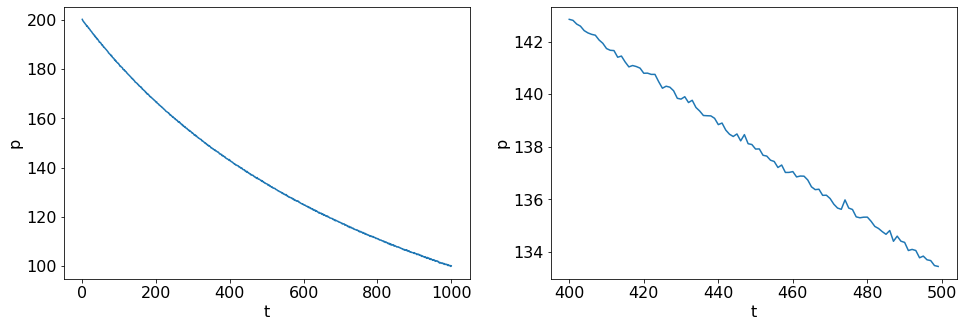

In [9]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, p)
plt.xlabel('t'); plt.ylabel('p')
plt.subplot(1, 2, 2)
plt.plot(t[400:500], p[400:500])
plt.xlabel('t'); plt.ylabel('p')
plt.show()

## Конечные разности

Простейший способ численно продифференцировать табличную функцию &mdash; вычислить конечную разность.
Рассмотрим две стандартные формулы для вычисления 
$$
p'(t_i) \approx \frac{p(t_{i+1}) - p(t_i)}{t_{i+1} - t_i}\\
p'(t_i) \approx \frac{p(t_{i+1}) - p(t_{i-1})}{t_{i+1} - t_{i-1}}
$$

Отметим, что формулы дифференцирования позволяют найти производную не в каждой точке $t_i$ (кроме некоторых крайних точек). Для дифференцирования в этих точках нужно использовать другие формулы. Сейчас мы не будем на это обращать внимание, просто будем считать производную там, где получится.

In [10]:
def diff1(t, p):
    # Функция np.diff возвращает массив соседних разностей - как раз то, что нужно
    return np.diff(p) / np.diff(t)
#     return (p[1:] - p[:-1]) / (t[1:] - t[:-1])


def diff2(t, p):
    # Разность через одну точку удобнее считать с помощью операций с частями массива
    return (p[2:] - p[:-2]) / (t[2:] - t[:-2])


def left_difference(X, Y, x):
    point_index = X.index(x)
    step = X[point_index] - X[point_index - 1]
    first_derivative = (Y[point_index] - Y[point_index - 1]) / step
    second_derivative = (Y[point_index] - 2 *
                         Y[point_index - 1] + Y[point_index - 2])/(step ** 2)
    return (first_derivative, second_derivative)


def right_difference(X, Y, x):
    point_index = X.index(x)
    step = X[point_index + 1] - X[point_index]
    first_derivative = (Y[point_index + 1] - Y[point_index]) / step
    second_derivative = (Y[point_index + 2] - 2 *
                         Y[point_index + 1] + Y[point_index])/(step ** 2)
    return (first_derivative, second_derivative)


def central_difference(X, Y, x):
    point_index = X.index(x)
    step = X[point_index + 1] - X[point_index]
    first_derivative = (Y[point_index + 1] - Y[point_index - 1]) / (2*step)
    second_derivative = (Y[point_index + 2] - 2 *
                         Y[point_index] + Y[point_index - 2])/(4 * (step ** 2))
    return (first_derivative, second_derivative)

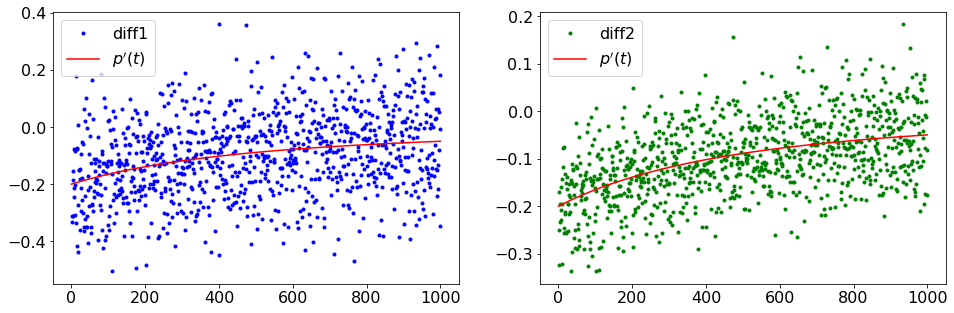

In [11]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(t[1:], diff1(t, p), 'b.', label="diff1")
plt.plot(t, pprime, 'r-', label="$p'(t)$")
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="$p'(t)$")
plt.legend(loc='best')

plt.show()

Видно, что формула второго порядка дает результаты, которые ближе к точному значению. Объясняется ли это тем, что вторая формула имеет второй порядок аппроксимации, а вторая &mdash; лишь первый?

Вспомним, что при численном дифференцировании имеется два источника ошибок &mdash; первая связана с приближенным характером конечной разности (ошибка метода или ошибка аппроксимации), а вторая &mdash; с погрешностью в значениях $p(t_i)$ (ошибка вычислений).

Пусть $\tau = t_{i+1} - t_i$, а $M_k$ &mdash; максимум $k$-й производной функции $p(t)$.

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+1} - p_i}{\tau}$  | $\frac{M_2 \tau}{2}$  | $ \frac{2\Delta p}{\tau} $ |
| $\frac{p_{i+1} - p_{i-1}}{2\tau}$  | $\frac{M_3 \tau^2}{6}$  | $\frac{2\Delta p}{2\tau} = \frac{\Delta p}{\tau}$  |

Подставим конкретные значения: $\tau = 1, \Delta p \approx 0.3$ (3 стандартных отклонения). В качестве оценок для максимума возьмем
$$
M_k = \frac{p_0 k!}{t_0^k}
$$
Это значение можно получить из разложения
$$
\frac{p_0}{1 - t/t_0} = 
\sum_{k=0}^\infty (-1)^k \frac{p_0 k!}{t_0^k} \frac{t^k}{k!}
$$

Подставляя эти значения, получаем

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+1} - p_i}{\tau}$  | $2\cdot 10^{-4}$  | $0.6$ |
| $\frac{p_{i+1} - p_{i-1}}{2\tau}$  | $2\cdot 10^{-7}$  | $0.3$  |

В данном случае погрешность, связанная с неточным заданием $p(t_i)$, на много порядков превосходит погрешность метода. Как же уменьшить эту ошибку? Достаточно взять две более удаленные точки, например
$$
p'(x_i) \approx \frac{p(t_{i+10}) - p(t_{i-10})}{t_{i+10} - t_{i-10}}
$$

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+10} - p_{i-10}}{20\tau}$  | $\frac{M_3 (10\tau)^2}{6} \approx 2 \cdot 10^{-5}$  | $\frac{2\Delta p}{20\tau} = \frac{\Delta p}{10\tau} \approx 0.03$  |

In [12]:
def diff20(t, p):
    return (p[20:] - p[:-20]) / (t[20:] - t[:-20])

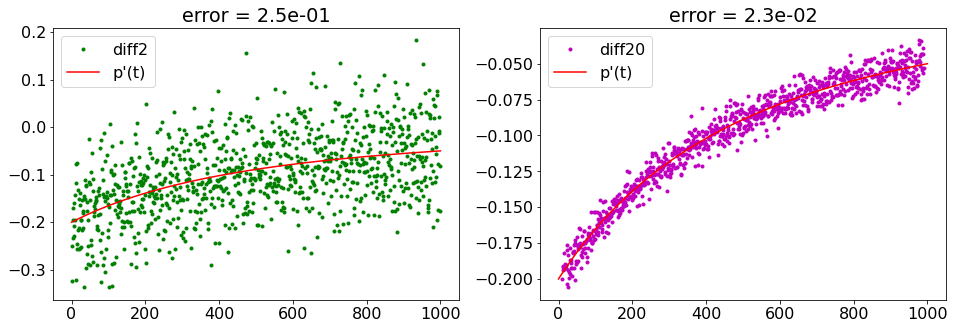

In [13]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = {:.1e}'.format(np.abs(diff2(t, p) - pprime[1:-1]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[10:-10], diff20(t, p), 'm.', label="diff20")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = {:.1e}'.format(np.abs(diff20(t, p) - pprime[10:-10]).max()))
plt.legend(loc='best')
plt.show()

Видно, что расстояние в 20 точек сработало гораздо лучше расстояния в 2 точки. Но оптимально ли это число?

## Задание 1.



Теоретически найти оптимальное расстояние (имеющее минимальную оценку для суммарной ошибки) между точками, используемыми для вычисления производной. Сравнить фактическую ошибку с теоретической оценкой.

In [14]:
def diff_n(t, p, n_):
    n = n_ * 2
    return (p[n:] - p[:-n]) / (t[n:] - t[:-n])

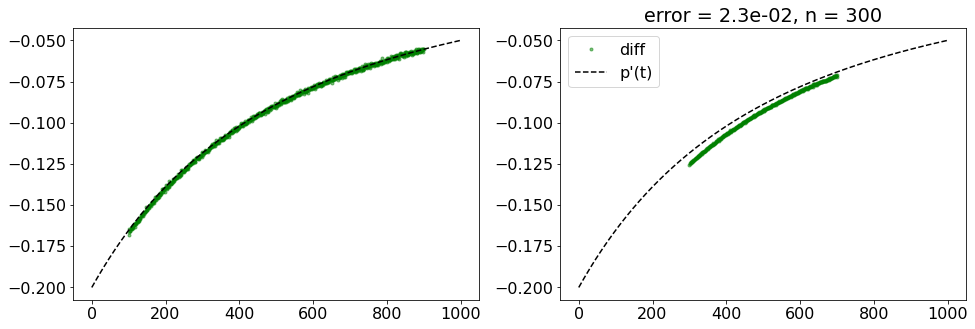

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

n = 100
axs[0].plot(t[n:-n], diff_n(t, p, n), 'g.', alpha=0.5, label="diff")
axs[0].plot(t, pprime, 'k--', label="p'(t)")

n = 300
axs[1].plot(t[n:-n], diff_n(t, p, n), 'g.', alpha=0.5, label="diff")
axs[1].plot(t, pprime, 'k--', label="p'(t)")

plt.title('error = {:.1e}, n = {}'.format(np.abs(diff20(t, p) - pprime[10:-10]).max(), n))
plt.legend()
plt.show()

In [16]:
# Истинное значение третьей производной
dddp = - 6 * p0 / t0**3 / (1 + t / t0)**4; 

# раскладывая по Тейлору до o(n**3), находим ошибку связанную с методом:
def err_method(n): return np.abs(1 / 6 * n**2 * dddp[n:-n]);

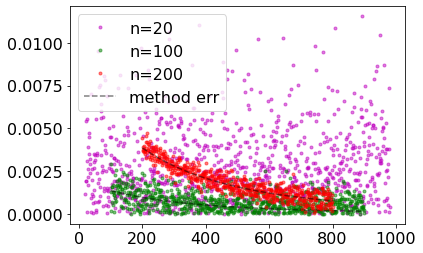

In [17]:
# интересно посмотреть на ошибку при разных n
n = 20
err = np.abs(pprime[n:-n]-diff_n(t, p, n))
plt.plot(t[n:-n], err, 'm.', label="n={}".format(n), alpha=0.5)

n = 100
err = np.abs(pprime[n:-n]-diff_n(t, p, n))
plt.plot(t[n:-n], err, 'g.', label="n={}".format(n), alpha=0.5)
plt.plot(t[n:-n], err_method(n), 'k--', alpha=0.5)

n = 200
err = np.abs(pprime[n:-n]-diff_n(t, p, n))
plt.plot(t[n:-n], err, 'r.', label="n={}".format(n), alpha=0.5)
plt.plot(t[n:-n], err_method(n), 'k--', label="method err", alpha=0.5)

plt.legend()
plt.show()

Получается, что мы ищем минимум функции
$$
    F(n) = \frac{1}{6} n^2 p''' + \frac{\varepsilon}{n},
$$
которая минимизируется при
$$
    n_\text{opt}(t) = \sqrt[3]{\frac{3 \varepsilon}{p'''(t)}}.
$$
Построим получившийся график $n_\text{opt}(t)$.

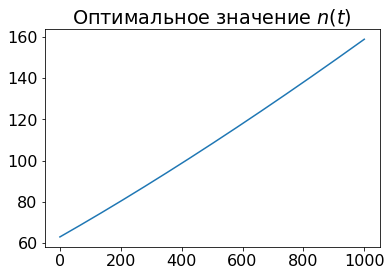

In [18]:
plt.plot(t, (3 * 0.1 / np.abs(dddp))**(1/3))
plt.title("Оптимальное значение $n(t)$")
plt.show()

Так что выбор $n=100$ был вполне неплохой идеей.

# Сглаживание данных



Несколько другой подход к данной задаче заключается в предварительной очистке данных от шума. Для этого можно попытаться описать данные какой-либо простой зависимостью, а параметры зависимости подогнать по методу наименьших квадратов. Для этого служит функция **np.polyfit**, которая приближает данные многочленом заданной небольшой степени.

In [19]:
# Подогнать данные (t_i, p_i) многочленом пятой степени
coeff, [err], *_ =  np.polyfit(t, p, 5, full=True)

Чтобы вычислить полученный многочлен в заданной точке (точках) можно использовать
**np.polyval**

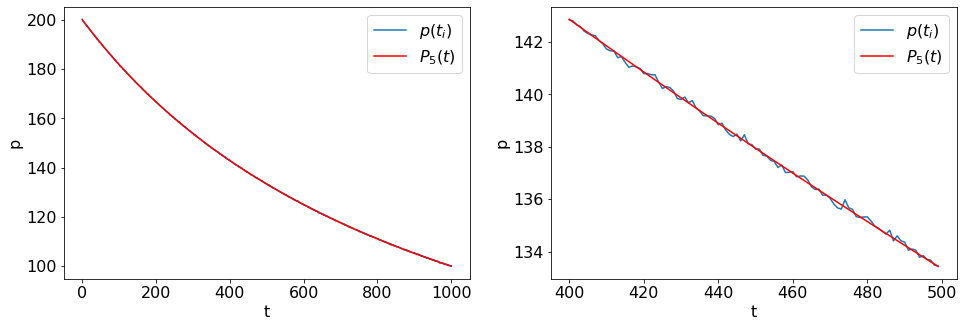

In [20]:
p5 = np.poly1d(coeff)

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(t, p, label='$p(t_i)$')
plt.plot(t, p5(t), 'r-', label='$P_5(t)$')

plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');


plt.subplot(1, 2, 2)
plt.plot(t[400:500], p[400:500], label='$p(t_i)$')
plt.plot(t[400:500], p5(t[400:500]), 'r-', label='$P_5(t)$')

plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Как же определить оптимальный порядок аппроксимирующего многочлена? Слишком маленький порядок не сможет хорошо приблизить данные, а слишком большой будет приближать данные вместе с шумом. В машинном обучении эта проблема назвается компромиссом между сдвигом и дисперсией (bias-variance tradeoff). Переход между данной границей хорошо заметен на графике ошибки в зависимости от степени многочлена. 

Text(0, 0.5, '$\\sum r_i^2$')

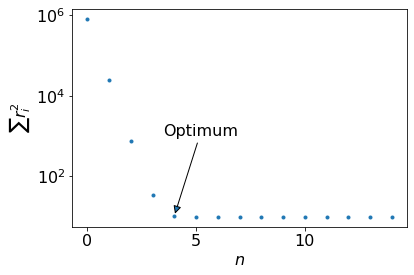

In [21]:
degs = list(range(0, 15))
errs = []
for deg in degs:
    # Сейчас нас интересует только ошибка приближения
    _, [err], *_ =  np.polyfit(t, p, deg, full=True)
    errs.append(err)
    
plt.semilogy(degs, errs, '.')
plt.annotate("Optimum", xy=(degs[4], errs[4]), xytext=(3.5, 1e3), 
             arrowprops={"arrowstyle":"-|>"})
plt.xlabel('$n$')
plt.ylabel('$\sum r_i^2$')

Итак, оптимальная степень многочлена &mdash; 4. В этот раз для вычисления многочлена превратим набор коэффициентов в объект **np.poly1d**.

In [22]:
P4_coeff = np.polyfit(t, p, deg=4) # Получаем с помощью polyfit коэффициенты
P4 = np.poly1d(P4_coeff)           # Превращаем в poly1d
P4der = P4.deriv(m=1)              # poly1d умеет вычислять свои производные

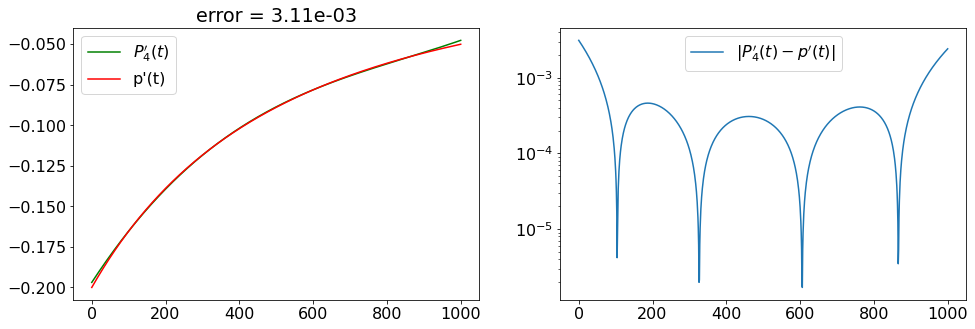

In [23]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(t, P4der(t), 'g-', label="$P_4'(t)$")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = {:.2e}'.format(np.abs(P4der(t) - pprime).max()))
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.semilogy(t, np.abs(P4der(t) - pprime), label="$|P_4'(t) - p'(t)|$")
plt.legend(loc='best')
plt.show()

# Сглаживание сплайном


Не всегда даже гладкие данные могут быть хорошо описаны многочленом. Особенно плохо приближаются осциллирующие данные. В этом случае приближение многочленом может быть заменено на приближение сплайном.

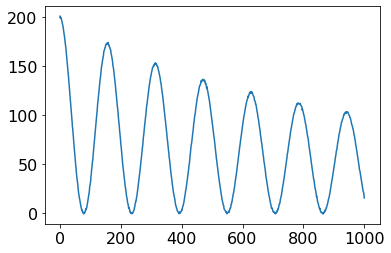

In [24]:
w0 = 0.04
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
uprime = -p0*t0*(1 + np.cos(w0*t) + (t+t0)*w0*np.sin(w0*t))/(2*(t+t0)**2)

plt.plot(t, u)
plt.show()

Попробуем снова приближать многочленами разных степеней. В этом случае характерного излома не наблюдается.

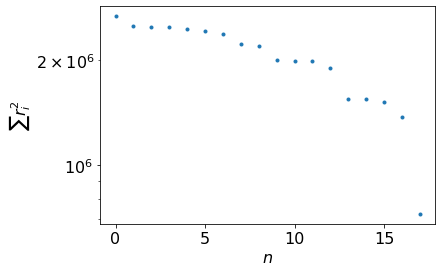

In [25]:
degs = list(range(0, 18))
errs = []
for deg in degs:
    _, [err], *_ =  np.polyfit(t, u, deg, full=True)
    errs.append(err)
    
plt.semilogy(degs, errs, '.')
plt.xlabel('$n$')
plt.ylabel('$\sum r_i^2$')
plt.show()

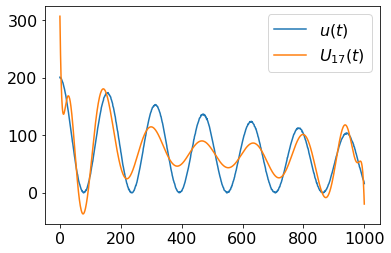

In [26]:
U17 = np.poly1d(np.polyfit(t, u, deg=17))
plt.plot(t, u, label='$u(t)$')
plt.plot(t, U17(t), label='$U_{17}(t)$')
plt.legend(loc='best')
plt.show()

Многочлен приближает данные отвратительно. Приблизим данные сплайном. Для этого воспользуемся возможностями библиотеки **scipy**

In [27]:
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

In [28]:
Uint = InterpolatedUnivariateSpline(t, u, k=3)

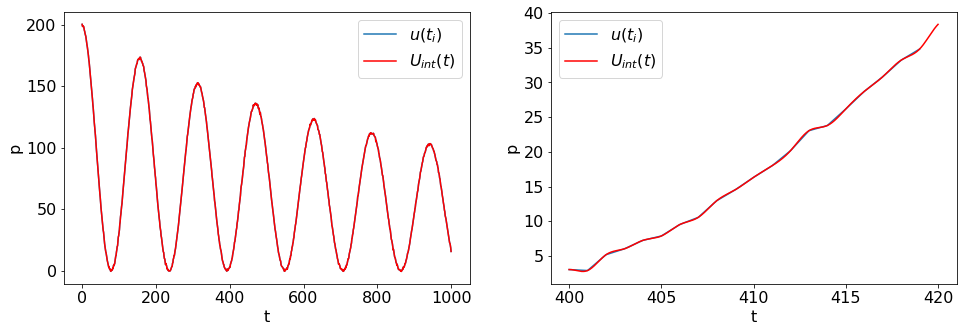

In [29]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u(t_i)$')
plt.plot(t, Uint(t), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:420], u[400:420], label='$u(t_i)$')

tt = np.linspace(t[400], t[420], 500) # Для отрисовки сплайна нужно больше точек

plt.plot(tt, Uint(tt), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Text(0.5, 1.0, 'error = 4.31e+00')

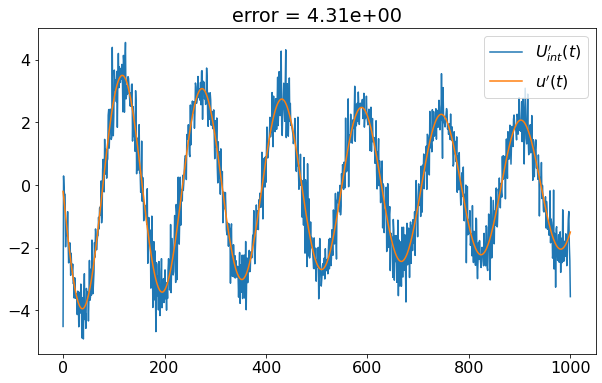

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(t, Uint.derivative()(t), label="$U_{int}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = {:.2e}'.format(np.abs(uprime - Uint.derivative()(t)).max()))

Интерполирующий сплайн повторяет все отклонения исходной функции из-за шума, но сам является гладкой функцией. Для того чтобы действительно сгладить данные, нужно использовать **UnivariateSpline**

In [31]:
# Параметр s отвечает за сглаживание
Usmooth = UnivariateSpline(t, u, s=100)

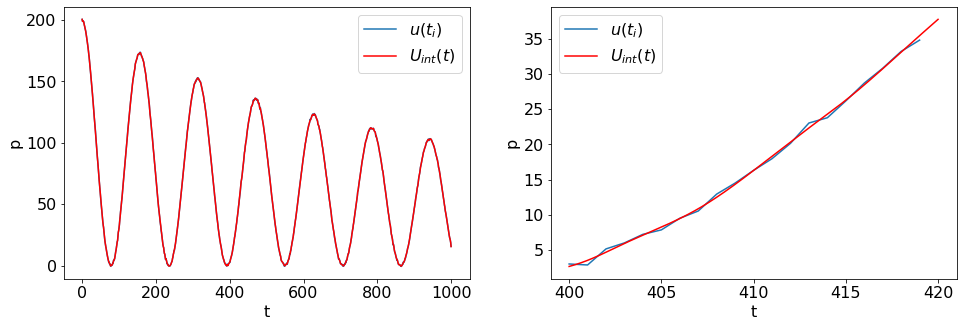

In [32]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u(t_i)$')
plt.plot(t, Usmooth(t), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:420], u[400:420], label='$u(t_i)$')

tt = np.linspace(t[400], t[420], 500) # Для отрисовки сплайна нужно больше точек

plt.plot(tt, Usmooth(tt), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

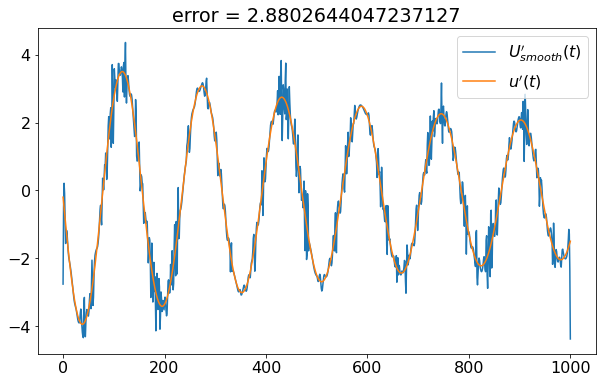

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(t, Usmooth.derivative()(t), label="$U_{smooth}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime - Usmooth.derivative()(t)).max()))
plt.show()

## Задание 2. 



Прочитать документацию к [UnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html) и определить оптимальное значение для параметра сглаживания **s**, учитывая, что шум был задан в виде $u_i = \dots + 0.5 \xi_i, \quad \xi_i \sim \mathcal N(0, 1)$. Экспериментально проверить оптимальность этого значения.

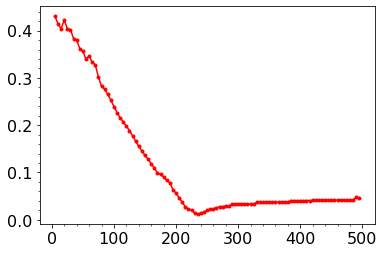

Оптимальный параметр сглаживания S=235
min mean err =1.23e-02


In [58]:
from scipy.interpolate import UnivariateSpline
import numpy as np

def err_s(s):
    Usmooth = UnivariateSpline(t, u, w=np.ones(1001), s=s)
    err = np.abs(Usmooth.derivative()(t)-uprime)
    return np.mean(err)

ss = [5 * i for i in range(1, 100)];
errs = [err_s(s) for s in ss]

fig, ax = plt.subplots()
plt.plot(ss, errs, "r.-")
ax.minorticks_on()
plt.show()
print("Оптимальный параметр сглаживания S=" + str(ss[np.argmin(errs)]))
print("min mean err ={:.2e}".format(err_s(235)))

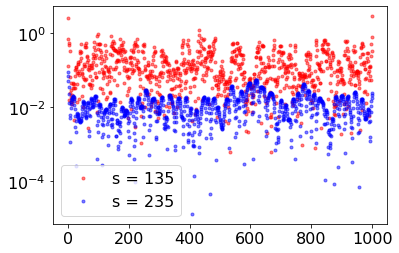

In [59]:
S = 135
Usmooth = UnivariateSpline(t, u, s=S)
err = np.abs(Usmooth.derivative()(t)-uprime)
plt.semilogy(t, err, "r.", alpha=0.5, label="s = {}".format(S))

S = 235
Usmooth = UnivariateSpline(t, u, s=S)
err = np.abs(Usmooth.derivative()(t)-uprime)
plt.semilogy(t, err, "b.", alpha=0.5, label="s = {}".format(S))

plt.legend()
plt.show()

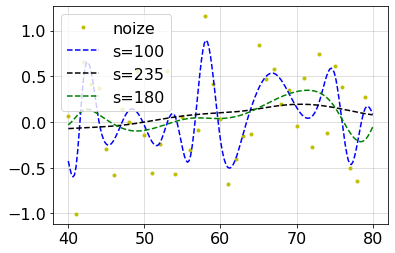

In [67]:
s1 = 100
s2 = 235
s3 = 180
u_clean = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t))

Usmooth1= UnivariateSpline(t, u, s=s1)
Usmooth2= UnivariateSpline(t, u, s=s2)
Usmooth3= UnivariateSpline(t, u, s=s3)

start = 40;
end   = 80;
t_s2e = np.linspace(start, end, 200)
u_clean2 = p0 / (1 + t_s2e/t0) * (0.5 + 0.5 * np.cos(w0 * t_s2e))

plt.plot(t[start:end], u[start:end]-u_clean[start:end], "y.", label="noize")
plt.plot(t_s2e, Usmooth1(t_s2e)-u_clean2, "b--", label='s=100')
plt.plot(t_s2e, Usmooth2(t_s2e)-u_clean2, "k--", label='s=235')
plt.plot(t_s2e, Usmooth3(t_s2e)-u_clean2, "g--", label='s=180')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [ ]:
Из этого всего видно, что скорее всего мы нашли оптимальный параметр сглаживания

# Безразностные формулы численного дифференцирования


В некоторых случаях имеет смысл вычислять производную с помощью использования значений в большом количестве точек. Рассмотрим три метода:

1) дифференцирование интерполяционного многочлена

2) сплайны

3) сеточный метод

Общая формула для них 
$$
y^{(k)}\left(x_{p}\right)=\sum_{j=0}^{n} C_{j}^{(p)} y_{j}+R_{n}(f) 
$$

В случае наличия шума в данных эти методы имеет смысл сочетать с соответствующим типом сглаживания самих данных. 

Дифференцирование интерполяционного многочлена работает хорошо, когда сама функция похожа на многочлен (поэтому чаще имеет смысл рассматривать многочлен не от всех точек, а лишь от ближайших). Кроме того, можно оптимально выбирать узлы, если есть такая возможность - как корни полиномов Чебышева.

Сплайны хорошо работают, но они учитывают только ближайшие точки. По этой же причине имеет смысл сначала сгладить данные сплайнами, а потом считать производные - либо через конечные разности, либо дифференцируя сами сплайны. Оптимальным видом сплайнов, который используется чаще всего на практике, являются кубические сплайны.

Сеточный метод заключается в том, что через формулу Тейлора выводят формулу для производной на каком-нибудь шаблоне из нескольких точек. Сеточный метод можно рассматривать как обобщение метода конечных разностей, обычно используется он и его разновидности, когда нужно решать интегральные и дифференциальные уравнения.



### Дифференцирование интерполяционного многочлена



Как известно таблично заданную функцию для равномерной сетки узлов с шагом $\mathrm{h}$ можно представить в виде суммы:

$$
f(x)=\frac{(-1)^{n} t \ldots(t-n)}{n !} \sum_{j=0}^{n} \sum \frac{(-1)^{j} C_{n}^{j} y_{j}}{t-\mathrm{j}}+h^{n+1} \cdot t \ldots(t-n) f\left(x, x_{0}, \ldots, x_{n}\right)
$$

Здесь первое слагаемое - многочлен Лагранжа для равноотстоящих узлов, а 2-ое остаток с использованием разделённой разности $f\left(x, x_{0}, x_{1}, \ldots, x_{n}\right) .$ Величина $t=\left(x-x_{0}\right) / h$ и $x=x_{0}+t h, \quad y_{j}=f\left(x_{j}\right)$.

Это выражение можно дифференцировать нужное число раз. 

При предположении нужного количества непрерывных производных для $f(x)$, то погрешность вычислений для $m$-ой производной будет

$$
R_{n}^{(m)}(x)=\sum_{j=0}^{n} \frac{m !}{(m-j) ! \cdot(n+j+1) !} \cdot f^{(n+j+1)}\left(\xi_{j}\right) \cdot w_{n}^{(m-j)}(x),
$$

где $\xi_{j}-$ некоторые точки, заключенные в интервале между наибольшим и наименьшим из чисел $x_{0}, x_{1}, \ldots, x_{n}, x .$ 

Здесь обозначено
$$
w_{n}(x)=\left(x-x_{0}\right) \ldots\left(x-x_{n}\right) 
$$

Отметим, что можно это всё переписать через многочлен Ньютона, что даст эквивалентные формулы (и с точно также оцениваемой погрешностью), но они уже будут представлены через конечные разности. А именно

$$
N(x)=f\left(x_{0}\right)+\left(x-x_{0}\right) f\left(x_{0}, x_{1}\right)+\ldots+\left(x-x_{0}\right) \ldots\left(x-x_{n-1}\right) f\left(x_{0}, ..., x_{n}\right)  
$$

В случае равноотстоящих узлов эти формулы записываются также просто.

Пусть $h-$ шаг таблицы. Возьмем формулу Ньютона для равных промежутков:

$$
N_{n}(x)=N\left(x_{0}+t h\right)=f_{0}+t f_{\frac{1}{2}}^{1}+\ldots+\frac{t(t-1) \ldots(t-n+1)}{n !} f_{\frac{n}{2}}^{n},
$$

где $f_{0}=f\left(x_{0}\right)$, a $f_{\frac{1}{2}}^{1}, f_{1}^{2}, \ldots$ конечные разности и $t=\left(x-x_{0}\right) / h .$ Тогда производные 1-го и 2-го порядка от многочлена Ньютона имеют вид:

$$
\begin{aligned}
&N_{n}^{\prime}(x)=h^{-1}\left(f_{\frac{1}{2}}^{1}+\frac{2 t-1}{2 !} f_{1}^{2}+\frac{3 t^{2}-6 t+2}{3 !} f_{\frac{3}{2}}^{3}+\ldots\right), \\
&N_{n}^{\prime \prime}(x)=h^{-2}\left(f_{1}^{2}+\frac{6 t-6}{3 !} f_{\frac{3}{2}}^{3}+\frac{12 t^{2}-36 t+22}{4 !} f_{2}^{4}+\ldots\right) .
\end{aligned}
$$  

Другой способ построить то же самое заключается в методе неопределённых коэффициентов.

\begin{aligned}
&C_{0}^{(p)}+C_{1}^{(p)}+\ldots+C_{n}^{(p)}=0 \\
&C_{0}^{(p)} x_{0}+C_{1}^{(p)} x_{1}+\ldots+C_{n}^{(p)} x_{n}=0 \\
&\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \\
&C_{0}^{(p)} x_{0}^{k-1}+C_{1}^{(p)} x_{1}^{k-1}+\ldots+C_{n}^{(p)} x_{n}^{k-1}=0 \\
&C_{0}^{(p)} x_{0}^{k}+C_{1}^{(p)} x_{1}^{k-1}+\ldots+C_{n}^{(p)} x_{n}^{k}=k ! \\
&C_{0}^{(p)} x_{0}^{k+1}+C_{1}^{(p)} x_{1}^{k+1}+\ldots+C_{n}^{(p)} x_{n}^{k+1}=(k+1) ! x_{p} \\
&\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \\
&C_{0}^{(p)} x_{0}^{n}+C_{1}^{(p)} x_{1}^{n}+\ldots+C_{n}^{(p)} x_{n}^{n}=n(n-1) \ldots(n-\mathrm{k}+1) x^{n-\mathrm{k}}
\end{aligned}

Ответ к этой системе можно выписать через определитель Вандермонда.

In [53]:
### Задание 3. (нет)

Жёсткопоршневый излучатель звука вмонтирован в стену - бесконечную перегородку (смотри рисунок). 

Вибрирующий поршень может представлять собой либо вибрирующую поверхность, либо вибрирующий слой воздуха. Основное предположение в анализе такого излучателя (которое на практике не является строго правильным для реальных поверхностей) в том, что все части поршня колеблются в фазе и с одинаковой амплитудой. 

Актуальность этой задачи в инженерной шумоизоляции заключается в том, что она служит базовой моделью для исследования звукового излучения от
различных типы поверхностей, напр. колонки; открытые концы фланцевых труб, пластин и ракушки и т.д.

Рассмотрим плоский круглый поршень радиуса z, установленный в бесконечной жесткой перегородке.
как показано на рисунке выше. Шум, излучаемый вибрирующим поршнем, можно смоделировать в с точки зрения многочисленных точечных монополей (монополей, где ka <1), излучающих вместе. Каждый из монополь, однако, излучается от жесткой отражающей поверхности. Таким образом, звуковое давление, создаваемое любым из монополей с перегородкой, в два раза больше давления от эквивалентного монополя в свободном пространстве.

Подробное решение этой задачи найти в лекциях и учебниках по акустике и теории звука, на эту тему с поиском асимптотик и разбором частных случаев пишут много статей, например,  **THE STUDY OF A VIBRATING PISTON MOUNTED IN A RIGID BAFFLE ANNALS of the ORADEA UNIVERSITY (
Fascicle of Management and Technological Engineering, Volume VII (XVII), 2008)**.

Радиационный импеданс поршня можно получить, интегрируя
распределение давления по площади поверхности поршня для получения общего звукового давления в точке, и затем снова интегрируя это по поверхности, чтобы получить силу Fp.  В результате появляются 
функции Струве https://mathworld.wolfram.com/StruveFunction.html . Функции Струве также часто возникают в задачах оптики, дифракции, электродинамики. 

На практике, разумеется, не вызывают каждый раз эти функции с помощью, например, Wolfram, так как их вычисления занимают много времени. Вместо этого используют расчётные графики и таблицы по акустике, а значения функций и их производных в промежуточных точках вычисляют с помощью интерполяции и формул численного дифференцирования. Кроме того, в этих таблицах обычно протабулированные функции Струве и Бесселя соединяются с какими-то экспериментальными данными, так как в этой науке далеко не все коэффициенты можно посчитать из базовых уравнений.



Вычислить производную функцию Струве 0-го индекса $H_{0}(x)$ в точке $x=7,5$, если $H_{0}(x)$ задана таблицей:

$$
\begin{array}{|c|c|c|c|c|c|c|c|}
\hline x & y & \Delta^{1} y & \Delta^{2} y & \Delta^{3} y & \Delta^{4} y & \Delta^{5} y & \Delta^{6} y \\
\hline 7,50 & 0,2009 & 49 & 0 & -1 & 1 & 0 & -3 \\
\hline 7,52 & 0,2058 & 49 & -1 & 0 & 1 & -3 & 7 \\
\hline 7,54 & 0,2107 & 48 & -1 & 1 & -2 & 4 & -9 \\
\hline 7,56 & 0,2155 & 47 & 0 & -1 & 2 & -5 & \\
\hline 7,58 & 0,2202 & 47 & -1 & 1 & -3 & & \\
\hline 7,60 & 0,2249 & 46 & 0 & 2 & & & \\
\hline 7,62 & 0,2295 & 46 & -2 & & & & \\
\hline 7,64 & 0,2341 & 44 & & & & & \\
\hline 7,66 & 0,2385 & & & & & & \\
\hline
\end{array}
$$

Здесь шаг $h=0,02$ и все числа в конечных разностях $\Delta^{1} y, \Delta^{2} y, \ldots$ надо умножить на $10^{-4}$.

Оценивая погрешность метода (усечения) как
$$
\frac{1}{3 h} \max \left|\Delta^{3} y\right| 
$$

показать, что она меньше погрешности, возникающей из-за округления.

Погрешность чисел в таблице считать равной половине единицы разряда последней значащей цифры.


### Сплайны.

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

Кубический сплайн. 

In [213]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

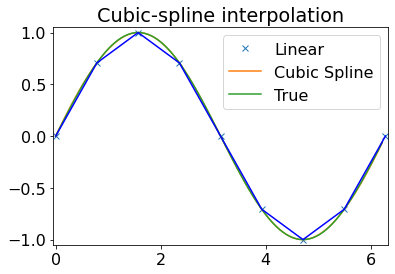

In [214]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

Производная кубического сплайна. 

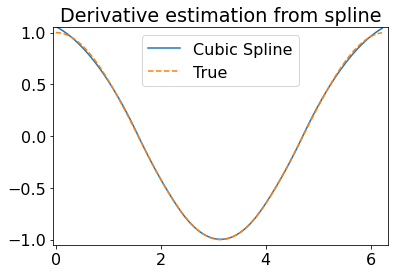

In [215]:
yder = interpolate.splev(xnew, tck, der=1)
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

Все производные кубического сплайна (с помощью https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.spalde.html ).

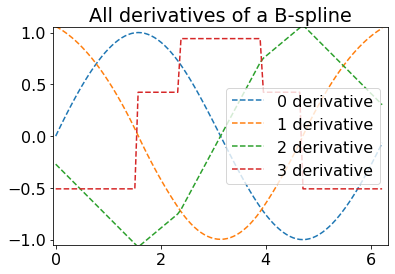

In [216]:
yders = interpolate.spalde(xnew, tck)
plt.figure()
for i in range(len(yders[0])):
   plt.plot(xnew, [d[i] for d in yders], '--', label=f"{i} derivative")
plt.legend()
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('All derivatives of a B-spline')
plt.show()

Интеграл от сплайна (с помощью https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splint.html ).

In [217]:
def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(out)):
        out[n] = interpolate.splint(0, x[n], tck)
    out += constant
    return out

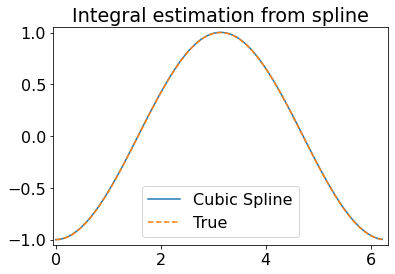

In [218]:
yint = integ(xnew, tck)
plt.figure()
plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Integral estimation from spline')
plt.show()

Корни сплайна. 

In [219]:
interpolate.sproot(tck)


array([3.14159265])

In [220]:
x = np.linspace(-np.pi/4, 2.*np.pi + np.pi/4, 21)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
interpolate.sproot(tck)

array([-2.22044605e-16,  3.14159265e+00,  6.28318531e+00])

Сплайн для кривой, заданной параметрически.

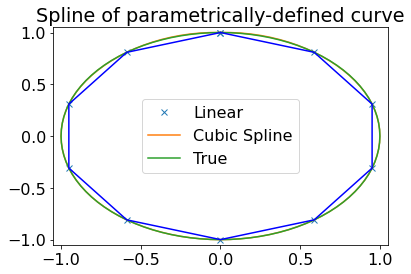

In [221]:
t = np.arange(0, 1.1, .1)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1], np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

### Задание 4.

Возьмите данные с шумом из первых двух заданий. Постройте график производной: 

1) с помощью кубического сплайна, без сглаживания данных

2) с помощью кубического сплайна, после сглаживания данных (как в задании 2).

Постройте графики для сравнения результатов. 

In [224]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))
pprime = -p0 / t0 / (1 + t / t0)**2; 

w0 = 0.04
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
uprime = -p0*t0*(1 + np.cos(w0*t) + (t+t0)*w0*np.sin(w0*t))/(2*(t+t0)**2)

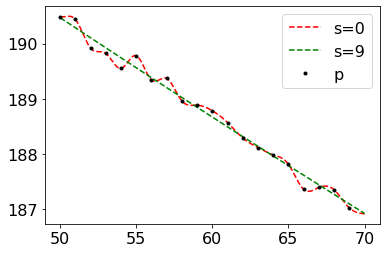

In [285]:
start = 50;
end   = 70;

tck_p = interpolate.splrep(t, p, s=0)
t_lin = np.linspace(start, end, 200)
p_spline = interpolate.splev(t_lin, tck_p, der=0)
plt.plot(t_lin, p_spline, "r--", label="s=0")

tck_p = interpolate.splrep(t, p, s=9)
t_lin = np.linspace(start, end, 200)
p_spline = interpolate.splev(t_lin, tck_p, der=0)
plt.plot(t_lin, p_spline, "g--", label="s=9")


plt.plot(t[start:end], p[start:end], "k.", label="p")
plt.legend()
plt.show()

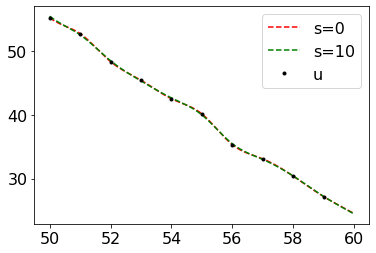

In [276]:
start = 50;
end   = 60;

tck_u = interpolate.splrep(t, u, s=0)
t_lin = np.linspace(start, end, 200)
u_spline = interpolate.splev(t_lin, tck_u, der=0)
plt.plot(t_lin, u_spline, "r--", label="s=0")

tck_u = interpolate.splrep(t, u, s=10)
t_lin = np.linspace(start, end, 200)
u_spline = interpolate.splev(t_lin, tck_u, der=0)
plt.plot(t_lin, u_spline, "g--", label="s=10")


plt.plot(t[start:end], u[start:end], "k.", label="u")
plt.legend()
plt.show()

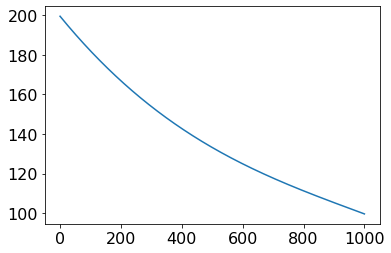

In [282]:
p_smooth = UnivariateSpline(t, p, w=np.ones(1001), s=260)
plt.plot(p_smooth(t))
plt.show()

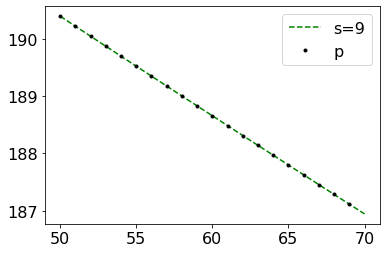

In [287]:
start = 50;
end   = 70;

tck_p = interpolate.splrep(t, p_smooth(t), s=9)
t_lin = np.linspace(start, end, 200)
p_spline = interpolate.splev(t_lin, tck_p, der=0)
plt.plot(t_lin, p_spline, "g--", label="s=9")


plt.plot(t[start:end], p_smooth(t)[start:end], "k.", label="p")
plt.legend()
plt.show()

# Задание 5.

При дифференцировании функций имеются два основных источника погрешности

- Ошибка метода - уменьшается при уменьшении $\boldsymbol{h}$

- Ошибка вычислений - растет при уменьшении $\boldsymbol{h}$


Поскольку характер роста ошибок различный, существует некоторое значение $h^{*}$, при котором ошибка минимальна. Рассмотрите полную ошибку
$\varepsilon_{\text {total }}=\varepsilon_{\text {method }}+\varepsilon_{\text {comp }}$
как функцию от $h$ для формулы центральной разности и найдите минимум. 

$$
f^{\prime}\left(x_{0}\right) \approx \frac{1}{12 h}\left(f_{i-2}-8 f_{i-1}+8 f_{i+1}-f_{i+2}\right)
$$


Максимум модуля пятой  производной в окрестности $x_{0}$ оценивайте как $M_{5}$, ошибку вычисления $f$ как $\Delta f$.

Раскладывая по Тейлору
$$
    \frac{1}{12h}(f(x_0-2h) - 8 f(x_0 -h) + 8 f(x_0 + h) - f(x_0 + 2h)) \approx f'(x_0) - \frac{2}{5} f^{(5)} h^5 + o(h^5).
$$
приходим к оптимизации выражения, вида
$$
    F = \frac{2}{5} M_5 h^5 + \frac{3 \varepsilon}{2 h},
$$
которое оптимизируется при
$$
    h_\text{opt} = \sqrt[5]{\frac{3 \varepsilon}{4 M_5}},
$$
где $\varepsilon = \Delta f$ из условия.

# Задание 6.

Используя сглаженные данные из задания 2, постройте график производной с помощью формулы из задания 5. Сравнить фактическую ошибку вычисления производной с теоретической оценкой из задания 5. Также сравнить, используя для вычисления производной не соседние точки, а точки на расстоянии, определённом из задания 1.

In [296]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

In [315]:
M5 = 2.4e-11
eps = 0.1
h_opt = np.int((3 * eps / 4 / M5)**(1/5))
h_opt

79

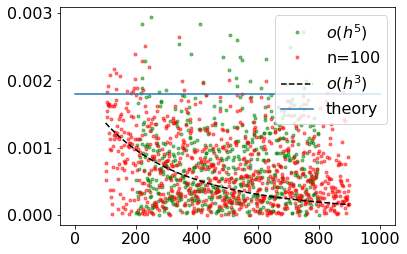

In [357]:
h_opt = 100
dp5 = (p[:-4*h_opt] - 8 * p[h_opt:-3*h_opt] + 8 * p[3*h_opt:-h_opt] - p[4*h_opt:])/12/h_opt
plt.plot(t[2*h_opt:-2*h_opt], np.abs(pprime[2*h_opt:-2*h_opt]-dp5), "g.", alpha=0.5, label="$o(h^5)$")

n = 100
err = np.abs(pprime[n:-n]-diff_n(t, p, n))
plt.plot(t[n:-n], err, 'r.', label="n={}".format(n), alpha=0.5)
plt.plot(t[n:-n], err_method(n), 'k--', alpha=1, label="$o(h^3)$")

plt.plot(t, t*0+3 * 0.1 / h_opt / 2 * 1.2, label="theory")

plt.legend()
plt.show()

In [358]:
np.mean(np.abs(pprime[2*h_opt:-2*h_opt]-dp5)),np.mean(err)

(0.0007556328315184589, 0.0007093514904105711)